In [23]:
import pandas as pd
%matplotlib inline

data_train = pd.read_csv('train.csv')  
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [24]:
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [25]:
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [26]:
data_test = pd.read_csv('test.csv')  
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
data_test.head()

# data_train.drop(['Ticket', 'Cabin'], axis = 1)
# data_train.dropna()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [30]:
#coding:utf-8

import matplotlib.pyplot as plt

# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False 
fig = plt.figure(figsize=(18,6), dpi=1600)
# 设定图表颜色alpha参数
fig.set(alpha=0.2)  

# 在一张大图里分列几个小图
plt.subplot2grid((2,3),(0,0))             
data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"获救情况 (1为获救)") 
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') 

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()


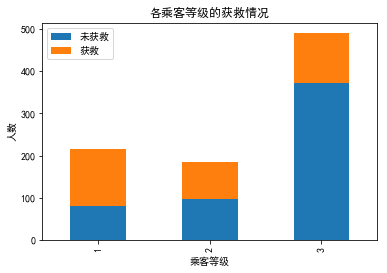

In [31]:
# 各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 

plt.show()

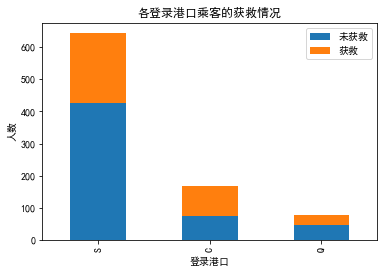

In [32]:
# 各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

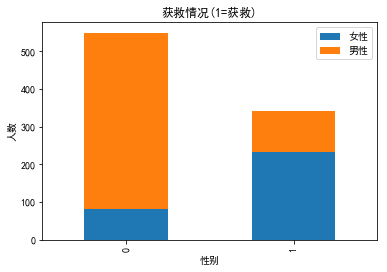

In [34]:
# 各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"获救情况(1=获救)")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

In [42]:
# 各种舱级别情况下各性别的获救情况
fig = plt.figure(figsize=(18,4), dpi=1600)
fig.set(alpha=0.2) 
plt.title(u"根据舱等级和性别的获救情况")

ax1 = fig.add_subplot(141)
female_highclass = data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts()
female_highclass = female_highclass.plot(kind='bar', label=u"女性/高级舱", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
plt.legend(loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
female_lowclass = data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts()
female_lowclass = female_lowclass.plot(kind='bar', label=u"女性/低级舱", color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend(loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
male_lowclass = data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts()
male_lowclass = male_lowclass.plot(kind='bar', label=u"男性/高级舱",color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend(loc='best')

ax4 = fig.add_subplot(144, sharey=ax1)
male_highclass = data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts()
male_highclass = male_highclass.plot(kind='bar', label=u"男性/低级舱", color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend(loc='best')

plt.show()

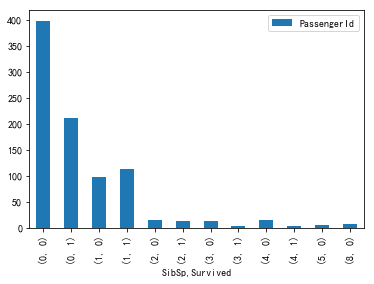

In [47]:
group = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(group.count()['PassengerId'])
df.plot(kind='bar', stacked=True)

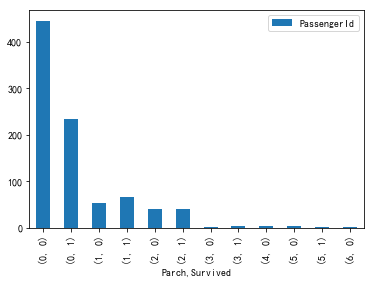

In [48]:
group = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(group.count()['PassengerId'])
df.plot(kind='bar')

In [52]:
X_train = data_train.drop("Survived",axis=1)
Y_train = data_train["Survived"]
X_test  = data_test.drop("PassengerId",axis=1).copy()
# X_test  = data_test.drop("PassengerId",axis=1)


In [54]:
data_train.describe(include=['O'])

Name   Sex  Ticket        Cabin  \
count                                          891   891     891          204   
unique                                         891     2     681          147   
top     Strom, Mrs. Wilhelm (Elna Matilda Persson)  male  347082  C23 C25 C27   
freq                                             1   577       7            4   

       Embarked  
count       889  
unique        3  
top           S  
freq        644

In [55]:
data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [56]:
data_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [57]:
data_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [60]:
data_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived')

Parch  Survived
4      4  0.000000
6      6  0.000000
5      5  0.200000
0      0  0.343658
2      2  0.500000
1      1  0.550847
3      3  0.600000

In [62]:
data_train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()

Age  Survived
0    0.42  1.000000
1    0.67  1.000000
2    0.75  1.000000
3    0.83  1.000000
4    0.92  1.000000
5    1.00  0.714286
6    2.00  0.300000
7    3.00  0.833333
8    4.00  0.700000
9    5.00  1.000000
10   6.00  0.666667
11   7.00  0.333333
12   8.00  0.500000
13   9.00  0.250000
14  10.00  0.000000
15  11.00  0.250000
16  12.00  1.000000
17  13.00  1.000000
18  14.00  0.500000
19  14.50  0.000000
20  15.00  0.800000
21  16.00  0.352941
22  17.00  0.461538
23  18.00  0.346154
24  19.00  0.360000
25  20.00  0.200000
26  20.50  0.000000
27  21.00  0.208333
28  22.00  0.407407
29  23.00  0.333333
..    ...       ...
58  44.00  0.333333
59  45.00  0.416667
60  45.50  0.000000
61  46.00  0.000000
62  47.00  0.111111
63  48.00  0.666667
64  49.00  0.666667
65  50.00  0.500000
66  51.00  0.285714
67  52.00  0.500000
68  53.00  1.000000
69  54.00  0.375000
70  55.00  0.500000
71  55.50  0.000000
72  56.00  0.500000
73  57.00  0.000000
74  58.00  0.600000
75  59.00  0.000000
76  60.00  0.500000
77  61.00  0.000000
78  62.00  0.500000
79  63.00  1.000000
80  64.00  0.000000
81  65.00  0.000000
82  66.00  0.000000
83  70.00  0.000000
84  70.50  0.000000
85  71.00  0.000000
86  74.00  0.000000
87  80.00  1.000000

[88 rows x 2 columns]

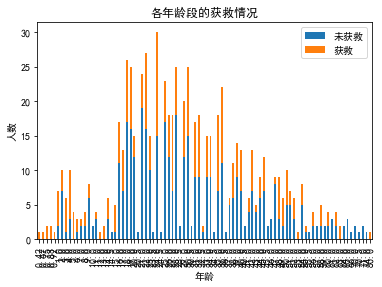

In [67]:
fig = plt.figure(figsize=(18,6), dpi=1600)
fig.set(alpha=0.2)  

Survived_0 = data_train.Age[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Age[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各年龄段的获救情况")
plt.xlabel(u"年龄") 
plt.ylabel(u"人数") 

plt.show()

In [71]:
data_train = data_train.drop(['Ticket', 'Cabin'], axis=1)
data_train.shape

(891, 10)

In [73]:
data_test.shape

(418, 11)

In [74]:
data_test = data_test.drop(['Ticket', 'Cabin'], axis=1)
data_test.shape

(418, 9)

In [77]:
data_train = data_train.drop(['Name', 'PassengerId'], axis=1)
data_test = data_test.drop(['Name'], axis=1)
data_test.shape

(418, 8)

In [80]:
data_train["Embarked"] = data_train["Embarked"].fillna("S")

In [84]:
data_train['Embarked'] = data_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [85]:
data_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    male  22.0      1      0   7.2500         0
1         1       1  female  38.0      1      0  71.2833         1
2         1       3  female  26.0      0      0   7.9250         0
3         1       1  female  35.0      1      0  53.1000         0
4         0       3    male  35.0      0      0   8.0500         0

In [86]:
data_train['Sex'] = data_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [87]:
data_train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0

In [89]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
X_test  = data_test.drop("PassengerId", axis=1).copy()
data_train.shape

(891, 8)

In [93]:
data_train

Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0           0       3    0  22.0      1      0    7.2500         0
1           1       1    1  38.0      1      0   71.2833         1
2           1       3    1  26.0      0      0    7.9250         0
3           1       1    1  35.0      1      0   53.1000         0
4           0       3    0  35.0      0      0    8.0500         0
5           0       3    0   NaN      0      0    8.4583         2
6           0       1    0  54.0      0      0   51.8625         0
7           0       3    0   2.0      3      1   21.0750         0
8           1       3    1  27.0      0      2   11.1333         0
9           1       2    1  14.0      1      0   30.0708         1
10          1       3    1   4.0      1      1   16.7000         0
11          1       1    1  58.0      0      0   26.5500         0
12          0       3    0  20.0      0      0    8.0500         0
13          0       3    0  39.0      1      5   31.2750         0
14          0       3    1  14.0      0      0    7.8542         0
15          1       2    1  55.0      0      0   16.0000         0
16          0       3    0   2.0      4      1   29.1250         2
17          1       2    0   NaN      0      0   13.0000         0
18          0       3    1  31.0      1      0   18.0000         0
19          1       3    1   NaN      0      0    7.2250         1
20          0       2    0  35.0      0      0   26.0000         0
21          1       2    0  34.0      0      0   13.0000         0
22          1       3    1  15.0      0      0    8.0292         2
23          1       1    0  28.0      0      0   35.5000         0
24          0       3    1   8.0      3      1   21.0750         0
25          1       3    1  38.0      1      5   31.3875         0
26          0       3    0   NaN      0      0    7.2250         1
27          0       1    0  19.0      3      2  263.0000         0
28          1       3    1   NaN      0      0    7.8792         2
29          0       3    0   NaN      0      0    7.8958         0
..        ...     ...  ...   ...    ...    ...       ...       ...
861         0       2    0  21.0      1      0   11.5000         0
862         1       1    1  48.0      0      0   25.9292         0
863         0       3    1   NaN      8      2   69.5500         0
864         0       2    0  24.0      0      0   13.0000         0
865         1       2    1  42.0      0      0   13.0000         0
866         1       2    1  27.0      1      0   13.8583         1
867         0       1    0  31.0      0      0   50.4958         0
868         0       3    0   NaN      0      0    9.5000         0
869         1       3    0   4.0      1      1   11.1333         0
870         0       3    0  26.0      0      0    7.8958         0
871         1       1    1  47.0      1      1   52.5542         0
872         0       1    0  33.0      0      0    5.0000         0
873         0       3    0  47.0      0      0    9.0000         0
874         1       2    1  28.0      1      0   24.0000         1
875         1       3    1  15.0      0      0    7.2250         1
876         0       3    0  20.0      0      0    9.8458         0
877         0       3    0  19.0      0      0    7.8958         0
878         0       3    0   NaN      0      0    7.8958         0
879         1       1    1  56.0      0      1   83.1583         1
880         1       2    1  25.0      0      1   26.0000         0
881         0       3    0  33.0      0      0    7.8958         0
882         0       3    1  22.0      0      0   10.5167         0
883         0       2    0  28.0      0      0   10.5000         0
884         0       3    0  25.0      0      0    7.0500         0
885         0       3    1  39.0      0      5   29.1250         2
886         0       2    0  27.0      0      0   13.0000         0
887         1       1    1  19.0      0      0   30.0000         0
888         0       3    1   NaN      1      2   23.

In [95]:
data_test['Embarked'] = data_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data_test['Sex'] = data_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [98]:
data_test.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3    0  34.5      0      0   7.8292         2
1          893       3    1  47.0      1      0   7.0000         0
2          894       2    0  62.0      0      0   9.6875         2
3          895       3    0  27.0      0      0   8.6625         0
4          896       3    1  22.0      1      1  12.2875         0

In [101]:
import numpy as np  
guess_ages = np.zeros((2,3))

In [112]:
for i in range(0, 2):  
    for j in range(0, 3):  
        guess_median = data_train[(data_train['Sex'] == i) & \
                              (data_train['Pclass'] == j+1)]['Age'].dropna().median()
        guess_ages[i,j] = int( guess_median/0.5 + 0.5 ) * 0.5

guess_ages        

array([[ 40.,  30.,  25.],
       [ 35.,  28.,  21.]])

In [113]:
for i in range(0, 2):  
    for j in range(0, 3):  
        data_train.loc[ (data_train.Age.isnull()) & (data_train.Sex == i) & (data_train.Pclass == j+1), 'Age'] = guess_ages[i,j]  

data_train['Age'] = data_train['Age'].astype(int)        
# data_train[ data_train['Age'].isnull() ][['Sex','Pclass','Age']].head(10)          

In [119]:
data_train

Survived  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked
0           0       3    0   22      1      0    7.2500         0
1           1       1    1   38      1      0   71.2833         1
2           1       3    1   26      0      0    7.9250         0
3           1       1    1   35      1      0   53.1000         0
4           0       3    0   35      0      0    8.0500         0
5           0       3    0   25      0      0    8.4583         2
6           0       1    0   54      0      0   51.8625         0
7           0       3    0    2      3      1   21.0750         0
8           1       3    1   27      0      2   11.1333         0
9           1       2    1   14      1      0   30.0708         1
10          1       3    1    4      1      1   16.7000         0
11          1       1    1   58      0      0   26.5500         0
12          0       3    0   20      0      0    8.0500         0
13          0       3    0   39      1      5   31.2750         0
14          0       3    1   14      0      0    7.8542         0
15          1       2    1   55      0      0   16.0000         0
16          0       3    0    2      4      1   29.1250         2
17          1       2    0   30      0      0   13.0000         0
18          0       3    1   31      1      0   18.0000         0
19          1       3    1   21      0      0    7.2250         1
20          0       2    0   35      0      0   26.0000         0
21          1       2    0   34      0      0   13.0000         0
22          1       3    1   15      0      0    8.0292         2
23          1       1    0   28      0      0   35.5000         0
24          0       3    1    8      3      1   21.0750         0
25          1       3    1   38      1      5   31.3875         0
26          0       3    0   25      0      0    7.2250         1
27          0       1    0   19      3      2  263.0000         0
28          1       3    1   21      0      0    7.8792         2
29          0       3    0   25      0      0    7.8958         0
..        ...     ...  ...  ...    ...    ...       ...       ...
861         0       2    0   21      1      0   11.5000         0
862         1       1    1   48      0      0   25.9292         0
863         0       3    1   21      8      2   69.5500         0
864         0       2    0   24      0      0   13.0000         0
865         1       2    1   42      0      0   13.0000         0
866         1       2    1   27      1      0   13.8583         1
867         0       1    0   31      0      0   50.4958         0
868         0       3    0   25      0      0    9.5000         0
869         1       3    0    4      1      1   11.1333         0
870         0       3    0   26      0      0    7.8958         0
871         1       1    1   47      1      1   52.5542         0
872         0       1    0   33      0      0    5.0000         0
873         0       3    0   47      0      0    9.0000         0
874         1       2    1   28      1      0   24.0000         1
875         1       3    1   15      0      0    7.2250         1
876         0       3    0   20      0      0    9.8458         0
877         0       3    0   19      0      0    7.8958         0
878         0       3    0   25      0      0    7.8958         0
879         1       1    1   56      0      1   83.1583         1
880         1       2    1   25      0      1   26.0000         0
881         0       3    0   33      0      0    7.8958         0
882         0       3    1   22      0      0   10.5167         0
883         0       2    0   28      0      0   10.5000         0
884         0       3    0   25      0      0    7.0500         0
885         0       3    1   39      0      5   29.1250         2
886         0       2    0   27      0      0   13.0000         0
887         1       1    1   19      0      0   30.0000         0
888         0       3    1   21      1      2   23.4500         0
889         1       1    0   26      0      0

In [122]:
guess_test_ages = np.zeros((2,3))
for i in range(0, 2):  
    for j in range(0, 3):  
        guess_test_median = data_test[(data_test['Sex'] == i) & \
                              (data_test['Pclass'] == j+1)]['Age'].dropna().median()
        guess_test_ages[i,j] = int( guess_test_median/0.5 + 0.5 ) * 0.5
        
guess_test_ages

array([[ 42.,  28.,  24.],
       [ 41.,  24.,  22.]])

In [123]:
for i in range(0, 2):  
    for j in range(0, 3):  
        data_test.loc[ (data_test.Age.isnull()) & (data_test.Sex == i) & (data_test.Pclass == j+1), 'Age'] = guess_test_ages[i,j]  

data_test['Age'] = data_test['Age'].astype(int) 

In [125]:
data_test

PassengerId  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked
0            892       3    0   34      0      0    7.8292         2
1            893       3    1   47      1      0    7.0000         0
2            894       2    0   62      0      0    9.6875         2
3            895       3    0   27      0      0    8.6625         0
4            896       3    1   22      1      1   12.2875         0
5            897       3    0   14      0      0    9.2250         0
6            898       3    1   30      0      0    7.6292         2
7            899       2    0   26      1      1   29.0000         0
8            900       3    1   18      0      0    7.2292         1
9            901       3    0   21      2      0   24.1500         0
10           902       3    0   24      0      0    7.8958         0
11           903       1    0   46      0      0   26.0000         0
12           904       1    1   23      1      0   82.2667         0
13           905       2    0   63      1      0   26.0000         0
14           906       1    1   47      1      0   61.1750         0
15           907       2    1   24      1      0   27.7208         1
16           908       2    0   35      0      0   12.3500         2
17           909       3    0   21      0      0    7.2250         1
18           910       3    1   27      1      0    7.9250         0
19           911       3    1   45      0      0    7.2250         1
20           912       1    0   55      1      0   59.4000         1
21           913       3    0    9      0      1    3.1708         0
22           914       1    1   41      0      0   31.6833         0
23           915       1    0   21      0      1   61.3792         1
24           916       1    1   48      1      3  262.3750         1
25           917       3    0   50      1      0   14.5000         0
26           918       1    1   22      0      1   61.9792         1
27           919       3    0   22      0      0    7.2250         1
28           920       1    0   41      0      0   30.5000         0
29           921       3    0   24      2      0   21.6792         1
..           ...     ...  ...  ...    ...    ...       ...       ...
388         1280       3    0   21      0      0    7.7500         2
389         1281       3    0    6      3      1   21.0750         0
390         1282       1    0   23      0      0   93.5000         0
391         1283       1    1   51      0      1   39.4000         0
392         1284       3    0   13      0      2   20.2500         0
393         1285       2    0   47      0      0   10.5000         0
394         1286       3    0   29      3      1   22.0250         0
395         1287       1    1   18      1      0   60.0000         0
396         1288       3    0   24      0      0    7.2500         2
397         1289       1    1   48      1      1   79.2000         1
398         1290       3    0   22      0      0    7.7750         0
399         1291       3    0   31      0      0    7.7333         2
400         1292       1    1   30      0      0  164.8667         0
401         1293       2    0   38      1      0   21.0000         0
402         1294       1    1   22      0      1   59.4000         1
403         1295       1    0   17      0      0   47.1000         0
404         1296       1    0   43      1      0   27.7208         1
405         1297       2    0   20      0      0   13.8625         1
406         1298       2    0   23      1      0   10.5000         0
407         1299       1    0   50      1      1  211.5000         1
408         1300       3    1   22      0      0    7.7208         2
409         1301       3    1    3      1      1   13.7750         0
410         1302       3    1   22      0      0    7.7500         2
411         1303       1    1   37      1      0   90.0000         2
412         1304       3    1   28      0      0    7.7750         0
413         1305       3    0   24      0      0    8.0500         0
414

In [127]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
X_test  = data_test.drop("PassengerId", axis=1).copy()

In [132]:
X_train.describe()

Pclass         Sex         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642    0.352413   29.072952    0.523008    0.381594   32.204208   
std      0.836071    0.477990   13.326339    1.102743    0.806057   49.693429   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   21.000000    0.000000    0.000000    7.910400   
50%      3.000000    0.000000   26.000000    0.000000    0.000000   14.454200   
75%      3.000000    1.000000   36.000000    1.000000    0.000000   31.000000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked  
count  891.000000  
mean     0.361392  
std      0.635673  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      2.000000

In [135]:
data_train.loc[ data_train['Fare'] <= 7.91, 'Fare'] = 0
data_train.loc[(data_train['Fare'] > 7.91) & (data_train['Fare'] <= 14.454), 'Fare'] = 1
data_train.loc[(data_train['Fare'] > 14.454) & (data_train['Fare'] <= 31), 'Fare']   = 2
data_train.loc[ data_train['Fare'] > 31, 'Fare'] = 3
data_train['Fare'] = data_train['Fare'].astype(int)
data_train

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0           0       3    0   22      1      0     0         0
1           1       1    1   38      1      0     0         1
2           1       3    1   26      0      0     0         0
3           1       1    1   35      1      0     0         0
4           0       3    0   35      0      0     0         0
5           0       3    0   25      0      0     0         2
6           0       1    0   54      0      0     0         0
7           0       3    0    2      3      1     0         0
8           1       3    1   27      0      2     0         0
9           1       2    1   14      1      0     0         1
10          1       3    1    4      1      1     0         0
11          1       1    1   58      0      0     0         0
12          0       3    0   20      0      0     0         0
13          0       3    0   39      1      5     0         0
14          0       3    1   14      0      0     0         0
15          1       2    1   55      0      0     0         0
16          0       3    0    2      4      1     0         2
17          1       2    0   30      0      0     0         0
18          0       3    1   31      1      0     0         0
19          1       3    1   21      0      0     0         1
20          0       2    0   35      0      0     0         0
21          1       2    0   34      0      0     0         0
22          1       3    1   15      0      0     0         2
23          1       1    0   28      0      0     0         0
24          0       3    1    8      3      1     0         0
25          1       3    1   38      1      5     0         0
26          0       3    0   25      0      0     0         1
27          0       1    0   19      3      2     0         0
28          1       3    1   21      0      0     0         2
29          0       3    0   25      0      0     0         0
..        ...     ...  ...  ...    ...    ...   ...       ...
861         0       2    0   21      1      0     0         0
862         1       1    1   48      0      0     0         0
863         0       3    1   21      8      2     0         0
864         0       2    0   24      0      0     0         0
865         1       2    1   42      0      0     0         0
866         1       2    1   27      1      0     0         1
867         0       1    0   31      0      0     0         0
868         0       3    0   25      0      0     0         0
869         1       3    0    4      1      1     0         0
870         0       3    0   26      0      0     0         0
871         1       1    1   47      1      1     0         0
872         0       1    0   33      0      0     0         0
873         0       3    0   47      0      0     0         0
874         1       2    1   28      1      0     0         1
875         1       3    1   15      0      0     0         1
876         0       3    0   20      0      0     0         0
877         0       3    0   19      0      0     0         0
878         0       3    0   25      0      0     0         0
879         1       1    1   56      0      1     0         1
880         1       2    1   25      0      1     0         0
881         0       3    0   33      0      0     0         0
882         0       3    1   22      0      0     0         0
883         0       2    0   28      0      0     0         0
884         0       3    0   25      0      0     0         0
885         0       3    1   39      0      5     0         2
886         0       2    0   27      0      0     0         0
887         1       1    1   19      0      0     0         0
888         0       3    1   21      1      2     0         0
889         1       1    0   26      0      0     0         1
890         0       3    0   32      0      0     0         2

[891 rows x 8 columns]

In [138]:
data_test[ data_test['Fare'].isnull() ][['Sex','Pclass','Age','Fare']].head() 

Sex  Pclass  Age  Fare
152    0       3   60   NaN

In [139]:
data_test['Fare'].fillna(data_test['Fare'].dropna().median(), inplace=True)
data_test.loc[ data_test['Fare'] <= 7.91, 'Fare'] = 0
data_test.loc[(data_test['Fare'] > 7.91) & (data_test['Fare'] <= 14.454), 'Fare'] = 1
data_test.loc[(data_test['Fare'] > 14.454) & (data_test['Fare'] <= 31), 'Fare']   = 2
data_test.loc[ data_test['Fare'] > 31, 'Fare'] = 3
data_test['Fare'] = data_test['Fare'].astype(int)
data_test

PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0            892       3    0   34      0      0     0         2
1            893       3    1   47      1      0     0         0
2            894       2    0   62      0      0     0         2
3            895       3    0   27      0      0     0         0
4            896       3    1   22      1      1     0         0
5            897       3    0   14      0      0     0         0
6            898       3    1   30      0      0     0         2
7            899       2    0   26      1      1     0         0
8            900       3    1   18      0      0     0         1
9            901       3    0   21      2      0     0         0
10           902       3    0   24      0      0     0         0
11           903       1    0   46      0      0     0         0
12           904       1    1   23      1      0     0         0
13           905       2    0   63      1      0     0         0
14           906       1    1   47      1      0     0         0
15           907       2    1   24      1      0     0         1
16           908       2    0   35      0      0     0         2
17           909       3    0   21      0      0     0         1
18           910       3    1   27      1      0     0         0
19           911       3    1   45      0      0     0         1
20           912       1    0   55      1      0     0         1
21           913       3    0    9      0      1     0         0
22           914       1    1   41      0      0     0         0
23           915       1    0   21      0      1     0         1
24           916       1    1   48      1      3     0         1
25           917       3    0   50      1      0     0         0
26           918       1    1   22      0      1     0         1
27           919       3    0   22      0      0     0         1
28           920       1    0   41      0      0     0         0
29           921       3    0   24      2      0     0         1
..           ...     ...  ...  ...    ...    ...   ...       ...
388         1280       3    0   21      0      0     0         2
389         1281       3    0    6      3      1     0         0
390         1282       1    0   23      0      0     0         0
391         1283       1    1   51      0      1     0         0
392         1284       3    0   13      0      2     0         0
393         1285       2    0   47      0      0     0         0
394         1286       3    0   29      3      1     0         0
395         1287       1    1   18      1      0     0         0
396         1288       3    0   24      0      0     0         2
397         1289       1    1   48      1      1     0         1
398         1290       3    0   22      0      0     0         0
399         1291       3    0   31      0      0     0         2
400         1292       1    1   30      0      0     0         0
401         1293       2    0   38      1      0     0         0
402         1294       1    1   22      0      1     0         1
403         1295       1    0   17      0      0     0         0
404         1296       1    0   43      1      0     0         1
405         1297       2    0   20      0      0     0         1
406         1298       2    0   23      1      0     0         0
407         1299       1    0   50      1      1     0         1
408         1300       3    1   22      0      0     0         2
409         1301       3    1    3      1      1     0         0
410         1302       3    1   22      0      0     0         2
411         1303       1    1   37      1      0     0         2
412         1304       3    1   28      0      0     0         0
413         1305       3    0   24      0      0     0         0
414         1306       1    1   39      0      0     0         1
415         1307       3    0   38      0      0     0         0
416         1308       3    0   24      0      0     0         0
417         1309       3    0   24      

In [140]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
X_test  = data_test.drop("PassengerId", axis=1).copy()

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg = logreg.score(X_train, Y_train)
acc_logreg

0.81032547699214363

In [154]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train)
acc_svc

0.85746352413019078

In [155]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn = knn.score(X_train, Y_train)
acc_knn

0.86195286195286192

In [156]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, Y_train)
acc_gaussian

0.78114478114478114

In [159]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = linear_svc.score(X_train, Y_train)
acc_linear_svc

0.70033670033670037

In [157]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train)
acc_decision_tree

0.93265993265993263

In [167]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_rf_pred = random_forest.predict(X_test)
acc_random_forest = random_forest.score(X_train, Y_train)
acc_random_forest

0.93265993265993263

In [168]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC',  'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_random_forest, acc_gaussian,  
              acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Model     Score
3            Random Forest  0.932660
6            Decision Tree  0.932660
1                      KNN  0.861953
0  Support Vector Machines  0.857464
2      Logistic Regression  0.810325
4              Naive Bayes  0.781145
5               Linear SVC  0.700337

In [169]:
submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": Y_rf_pred
    })

In [170]:
submission.to_csv('submission.csv', index=False)